In [1]:
import pandas as pd 
from rdkit import Chem
from path import Path

from metrics_batch_created import calculate_uniqueness, calculate_novelty, calculate_validity, plot_molecule_sizes, plot_atom_distribution_dict, calculate_scores, plot_scores


In [2]:
zinc_path = Path('rndm_zinc_drugs_clean_3.csv')
zinc_df = pd.read_csv(zinc_path)

mol_path = Path('generated_molecules_1000_charged.csv')
mol_df = pd.read_csv(mol_path)

In [3]:
mol_list = mol_df['SMILES'].to_list()

In [4]:
validity, valid_molecules = calculate_validity(mol_list)

[14:59:29] non-ring atom 0 marked aromatic
[14:59:29] Can't kekulize mol.  Unkekulized atoms: 18 19 20 21 23
[14:59:29] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 13
[14:59:29] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20 21 22
[14:59:29] Can't kekulize mol.  Unkekulized atoms: 11 12 21
[14:59:29] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 10 11 12 13 14
[14:59:29] Can't kekulize mol.  Unkekulized atoms: 20 21 24 25 26 27 28 29 30
[14:59:29] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 16
[14:59:29] Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 16 17 18 20 21
[14:59:29] Can't kekulize mol.  Unkekulized atoms: 2 3 11 12 13
[14:59:29] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 17
[14:59:29] Can't kekulize mol.  Unkekulized atoms: 9
[14:59:29] Can't kekulize mol.  Unkekulized atoms: 2 3 4 8 9 10
[14:59:29] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 14
[14:59:29] Can't kekulize mol.  Unkekulized atoms: 13 14 15 16 17
[14:59:29] Can't

In [5]:
validity

0.893

In [6]:
uniqueness, unique_molecules = calculate_uniqueness(valid_molecules)

In [7]:
uniqueness

1.0

In [8]:
novelty = calculate_novelty(unique_molecules, zinc_path)

100%|██████████| 893/893 [00:02<00:00, 318.16it/s]


In [9]:
novelty

1.0

In [10]:
scores = calculate_scores(valid_molecules)

In [11]:
scores_zinc = calculate_scores(zinc_df['smiles'].to_list())

KeyboardInterrupt: 

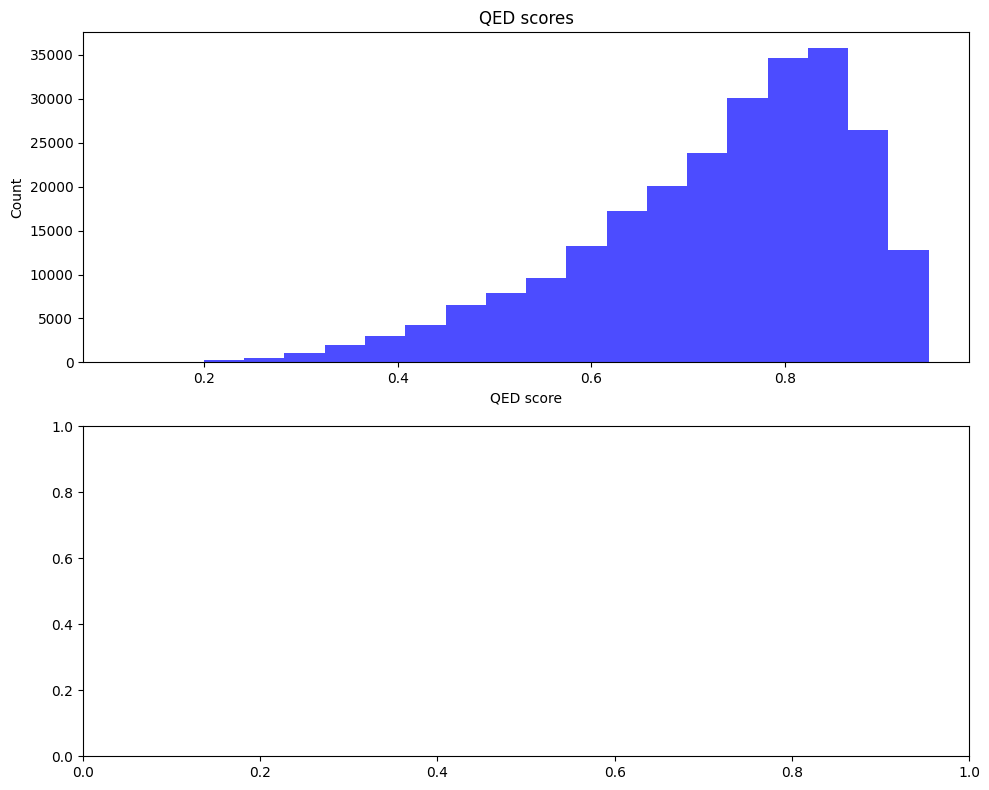

In [ ]:
plot_scores(scores_zinc)

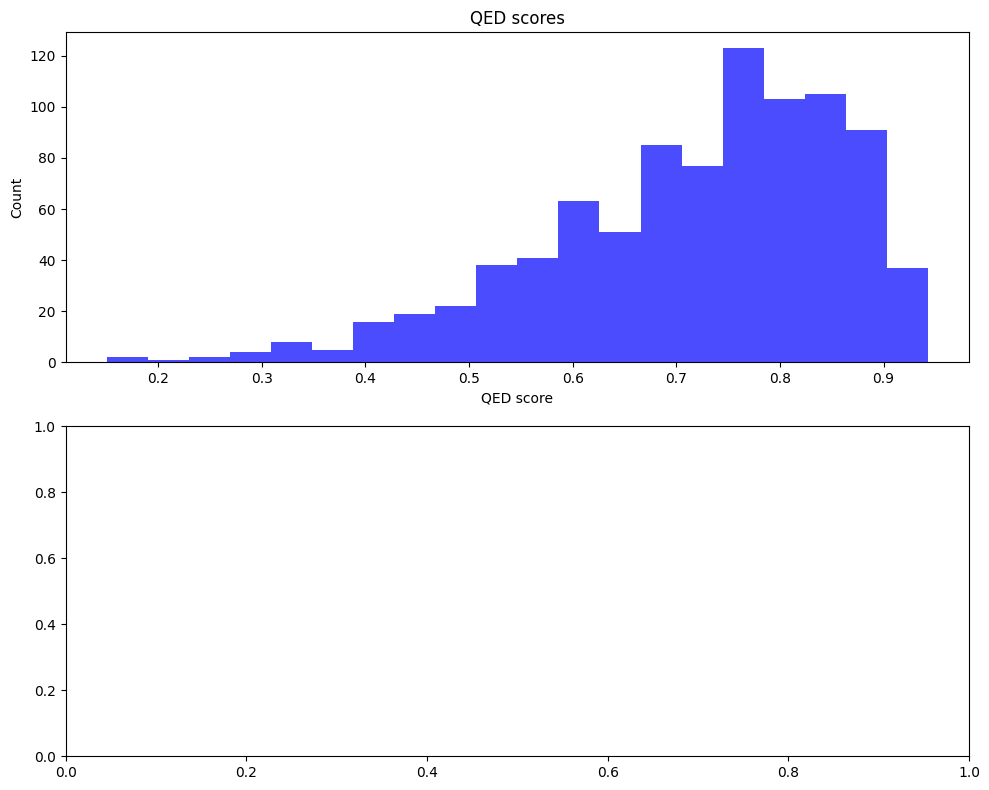

In [12]:
plot_scores(scores)

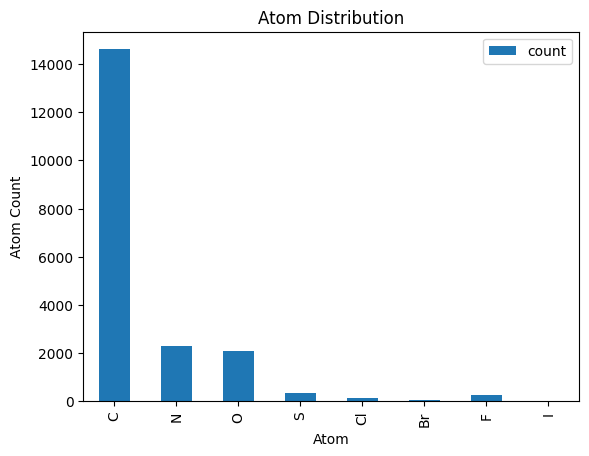

In [13]:
plot_atom_distribution_dict(valid_molecules)

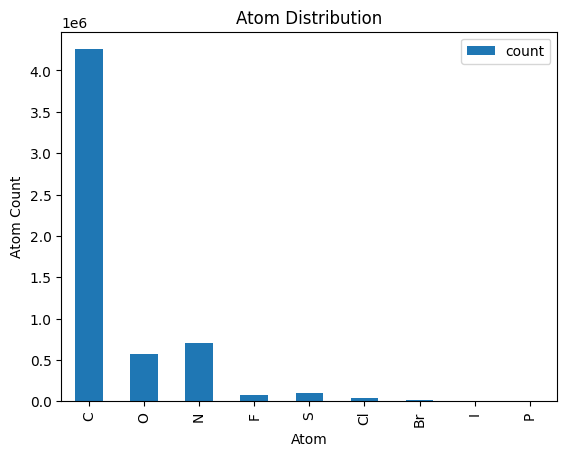

In [14]:
plot_atom_distribution_dict(zinc_df['smiles'].to_list())

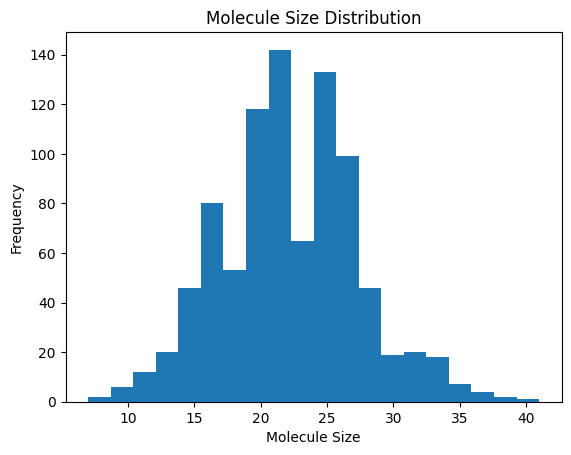

In [16]:
plot_molecule_sizes(valid_molecules)

In [21]:
def get_cycle_lengths(smiles):
    mol = Chem.MolFromSmiles(smiles)
    cycle_lengths = [len(cycle) for cycle in Chem.GetSymmSSSR(mol)]
    return cycle_lengths


df_valid = pd.DataFrame(valid_molecules, columns=['SMILES'])

df_valid['CycleLengths'] = df_valid['SMILES'].apply(get_cycle_lengths)


In [22]:
import matplotlib.pyplot as plt

# Plot histograms for cycle length in different rows of the same figure
def plot_histograms(data):
    fig, axs = plt.subplots(3, 2, figsize=(10, 10))
    axs[0, 0].hist(data['CycleLengths'].apply(lambda x: x.count(3)), bins=20)
    axs[0, 0].set_title('Cycle Length 3')
    axs[0, 1].hist(data['CycleLengths'].apply(lambda x: x.count(4)), bins=20)
    axs[0, 1].set_title('Cycle Length 4')
    axs[1, 0].hist(data['CycleLengths'].apply(lambda x: x.count(5)), bins=20)
    axs[1, 0].set_title('Cycle Length 5')
    axs[1, 1].hist(data['CycleLengths'].apply(lambda x: x.count(6)), bins=20)
    axs[1, 1].set_title('Cycle Length 6')
    axs[2, 0].hist(data['CycleLengths'].apply(lambda x: x.count(7)), bins=20)
    axs[2, 0].set_title('Cycle Length 7')
    axs[2, 1].hist(data['CycleLengths'].apply(lambda x: x.count(8)), bins=20)
    axs[2, 1].set_title('Cycle Length 8')
    plt.show()

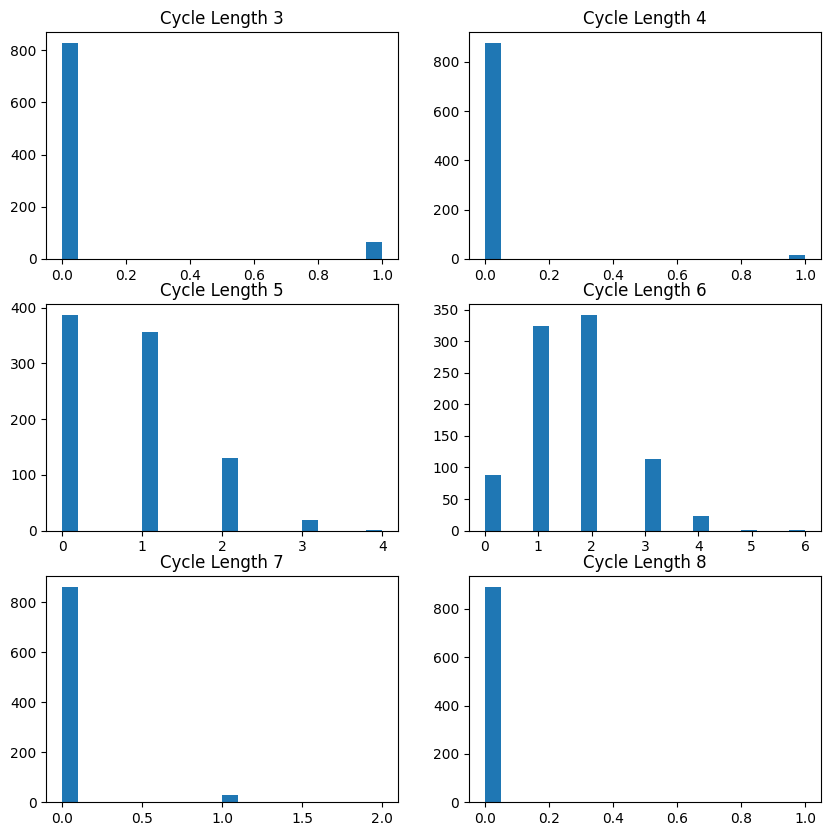

In [23]:
plot_histograms(df_valid)

In [24]:
from collections import Counter

def count_bonding_types(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return Counter([bond.GetBondType() for bond in mol.GetBonds()])

<Axes: >

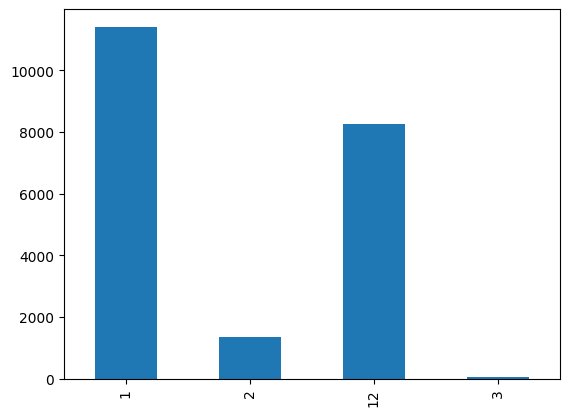

In [25]:
df_valid['BondingTypes'] = df_valid['SMILES'].apply(count_bonding_types)

#Plot 

df_valid['BondingTypes'].apply(pd.Series).fillna(0).astype(int).sum().plot.bar()